# Calling all dependencies for this project 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

## Importing K-NearestNeighbor Classifier 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# Reading and exploring the dataset

* Below we start by opening the subjected dataset using pandas syntax csv_read() which read the dataset and transform it to a structured tabular data for us to read.

In [2]:
dataset = pd.read_csv("/kaggle/input/diabetic2types/MyProject_2.csv")

**Gettting the number of rows & columns in the dataset**

In [3]:
dataset.shape

(16969, 11)

* DataSet comprises of 16969 observations and 11 fields

In [4]:
dub = dataset.drop_duplicates()
dub.shape

(189, 11)

* there are duplicated data , We must to solve this problem later to skip any other problems afterbuilding our Model

**Viewing Top 5 records of the dataset**

In [5]:
dataset.head()

,Age,Insulin,Polycystic ovary syndrome,Obesity,Smoking,breathing difficulty,Acanthosis Nigricans,confusion and difficulty focusing,Coma,Mumps virus,Diabetic
0,13,1,0,1,0,1,0,1,1,0,0
1,13,1,0,0,0,1,0,1,1,0,0
2,13,1,0,0,0,1,0,1,1,0,0
3,13,1,0,0,0,1,0,1,1,0,0
4,13,1,0,0,0,1,0,1,1,0,0


# gives information about the data types, columns, null value counts, memory usage etc...

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                16969 non-null  int64
 1   Insulin                            16969 non-null  int64
 2   Polycystic ovary syndrome          16969 non-null  int64
 3   Obesity                            16969 non-null  int64
 4   Smoking                            16969 non-null  int64
 5   breathing difficulty               16969 non-null  int64
 6   Acanthosis Nigricans               16969 non-null  int64
 7   confusion and difficulty focusing  16969 non-null  int64
 8   Coma                               16969 non-null  int64
 9   Mumps virus                        16969 non-null  int64
 10  Diabetic                           16969 non-null  int64
dtypes: int64(11)
memory usage: 1.4 MB


# DataSet comprises of 16969 observations and 11 fields :
* Age: Age(Years).
* Insulin: a hormone made in your pancreas. It helps your body use glucose (sugar) for energy.

  In type 1 diabetes your pancreas no longer makes insulin, so you have to   inject it to control your blood glucose levels.
* Polycystic Ovary Syndrome: more than half of women with PCOS develop type 2 diabetes by age 40. Gestational diabetes (diabetes when pregnant)—which puts the pregnancy and baby at risk and can lead to type 2 diabetes later in life for both mother and child.
* Obesity: Having obesity makes you more likely to develop diabetes, the condition of having too much glucose (sugar) circulating in your bloodstream. Obesity also causes diabetes to worsen faster. 
* Smoking: smoking is one cause of type 2 diabetes. In fact, people who smoke cigarettes are 30%–40% more likely to develop type 2 diabetes than people who don't smoke. People with diabetes who smoke are more likely than those who don't smoke to have trouble with insulin dosing and with managing their condition.
* Breathing Difficulty: People who have diabetes may feel short of breath because of high blood glucose, which is called hyperglycemia, or too little glucose, which is called hypoglycemia. Similar to ketoacidosis, too much or too little glucose can affect lung function and breathing. 
* Acanthosis Nigricans: Acanthosis nigricans is most commonly associated with diabetes and insulin resistance, but rarely it can be a sign of internal malignancy. It can also occur with hormone disorders or with the use of certain medications like systemic glucocorticoids and oral contraceptives.
# Confusion & Difficulty focusing :
* Confusion: The interference results in low blood sugar, which can cause sluggishness, confusion, and, in extreme cases, seizures and death. Diabetes in seniors, however, may be an even more chronically dangerous problem. Low blood sugar and cognitive decline can become a vicious cycle.
* Difficulty Focusing: When the body doesn't receive enough sugar or glucose for energy, brain cells can't function properly. This can make it difficult to concentrate.

$
* Coma: If you have diabetes, dangerously high blood sugar (hyperglycemia) or dangerously low blood sugar (hypoglycemia) can lead to a diabetic coma. If you go into a diabetic coma, you're alive — but you can't wake up or respond purposefully to sights, sounds or other types of stimulation.
* Mumps virus: mumps and rubella viral infections are associated with the onset of Type 1 diabetes.

# DataFrame.describe()
# this method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns.


* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.


In [7]:
# Only numerical columns would be displayed here unless parameter include="all")

print(dataset.describe().T)   # describe().T <---> To Transpose Indeces & Columns

                                     count       mean        std  min   25%  \
Age                                16969.0  39.531675  25.623488  1.0  14.0   
Insulin                            16969.0   0.495079   0.499991  0.0   0.0   
Polycystic ovary syndrome          16969.0   0.504921   0.499991  0.0   0.0   
Obesity                            16969.0   0.525841   0.499346  0.0   0.0   
Smoking                            16969.0   0.479168   0.499581  0.0   0.0   
breathing difficulty               16969.0   0.495138   0.499991  0.0   0.0   
Acanthosis Nigricans               16969.0   0.328128   0.469545  0.0   0.0   
confusion and difficulty focusing  16969.0   0.495079   0.499991  0.0   0.0   
Coma                               16969.0   0.493311   0.499970  0.0   0.0   
Mumps virus                        16969.0   0.482704   0.499715  0.0   0.0   
Diabetic                           16969.0   0.504921   0.499991  0.0   0.0   

                                    50%   75%   max

# Checking the missing values

In [8]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = ( ( dataset.isnull().sum() / dataset.isnull().count() )*100  ).sort_values(ascending=False)
missing_data = pd.concat( [total, percent], axis=1, keys=['Total', 'Percent'] )
missing_data.head(11)

,Total,Percent
Age,0,0.0
Insulin,0,0.0
Polycystic ovary syndrome,0,0.0
Obesity,0,0.0
Smoking,0,0.0
breathing difficulty,0,0.0
Acanthosis Nigricans,0,0.0
confusion and difficulty focusing,0,0.0
Coma,0,0.0
Mumps virus,0,0.0


* There are no Missing Values

# Plotting the dataset
* The diabetes updated dataset is ready for a basic plotting, in order to see how would our data looks like, also plotting at this stage will help me decide which column I will choose to run a K-nearest neighbour (KNN) experiment. For plotting I’ve used pairplot() function with the help of Seaborn library , that will give me a range of graph plotting for each group of data presented in the dataset 

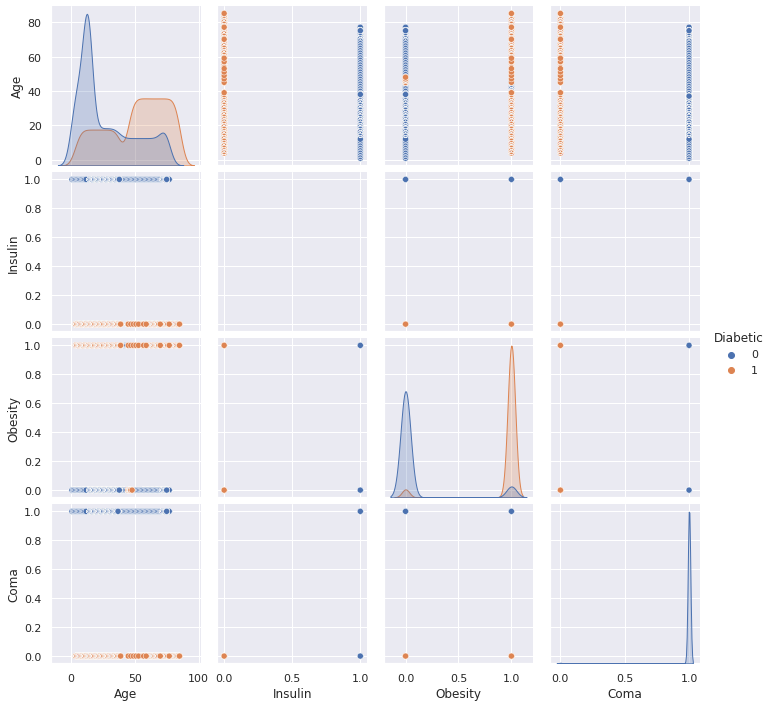

In [9]:
graph = ['Age','Insulin','Obesity','Coma','Diabetic']
sns.set()
print(sns.pairplot(dataset[graph],hue='Diabetic', diag_kind='kde'))  # the hue parameter determines which column in the data frame should be used for colour encoding

# checking the balance of the data by plotting the count of outcomes by their value

1    8568
0    8401
Name: Diabetic, dtype: int64


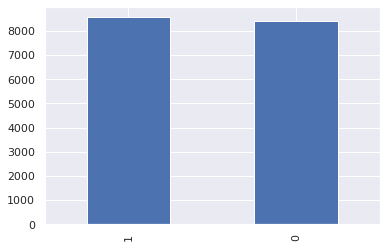

In [10]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = dataset["Diabetic"].map(lambda x: color_wheel.get(x + 1))
print(dataset['Diabetic'].value_counts())
p= dataset['Diabetic'].value_counts().plot(kind="bar")

* 8401 Type1Diabetic Patients 
* 8568 Type2Diabetic Patients

In [11]:
dataset.groupby('Diabetic').mean().T

Diabetic,0,1
Age,27.730746,51.102591
Insulin,1.000000,0.000000
Polycystic ovary syndrome,0.000000,1.000000
Obesity,0.093203,0.950047
Smoking,0.049756,0.900210
breathing difficulty,1.000000,0.000117
Acanthosis Nigricans,0.000000,0.649860
confusion and difficulty focusing,1.000000,0.000000
Coma,0.996429,0.000000
Mumps virus,0.975003,0.000000


# Pearson's Correlation Coefficient or simply Correlation

* Pearson's Correlation Coefficient helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

* corr() method is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

In [12]:
dataset.corr()

,Age,Insulin,Polycystic ovary syndrome,Obesity,Smoking,breathing difficulty,Acanthosis Nigricans,confusion and difficulty focusing,Coma,Mumps virus,Diabetic
Age,1.000000,-0.456054,0.456054,0.476436,0.438139,-0.456029,0.135875,-0.456054,-0.455825,-0.430661,0.456054
Insulin,-0.456054,1.000000,-1.000000,-0.857949,-0.851152,0.999882,-0.691997,1.000000,0.996470,0.975540,-1.000000
Polycystic ovary syndrome,0.456054,-1.000000,1.000000,0.857949,0.851152,-0.999882,0.691997,-1.000000,-0.996470,-0.975540,1.000000
Obesity,0.476436,-0.857949,0.857949,1.000000,0.910105,-0.858072,0.556029,-0.857949,-0.854260,-0.832576,0.857949
Smoking,0.438139,-0.851152,0.851152,0.910105,1.000000,-0.851264,0.513781,-0.851152,-0.847795,-0.828102,0.851152
breathing difficulty,-0.456029,0.999882,-0.999882,-0.858072,-0.851264,1.000000,-0.691827,0.999882,0.996352,0.975425,-0.999882
Acanthosis Nigricans,0.135875,-0.691997,0.691997,0.556029,0.513781,-0.691827,1.000000,-0.691997,-0.689554,-0.675070,0.691997
confusion and difficulty focusing,-0.456054,1.000000,-1.000000,-0.857949,-0.851152,0.999882,-0.691997,1.000000,0.996470,0.975540,-1.000000
Coma,-0.455825,0.996470,-0.996470,-0.854260,-0.847795,0.996352,-0.689554,0.996470,1.000000,0.971919,-0.996470
Mumps virus,-0.430661,0.975540,-0.975540,-0.832576,-0.828102,0.975425,-0.675070,0.975540,0.971919,1.000000,-0.975540


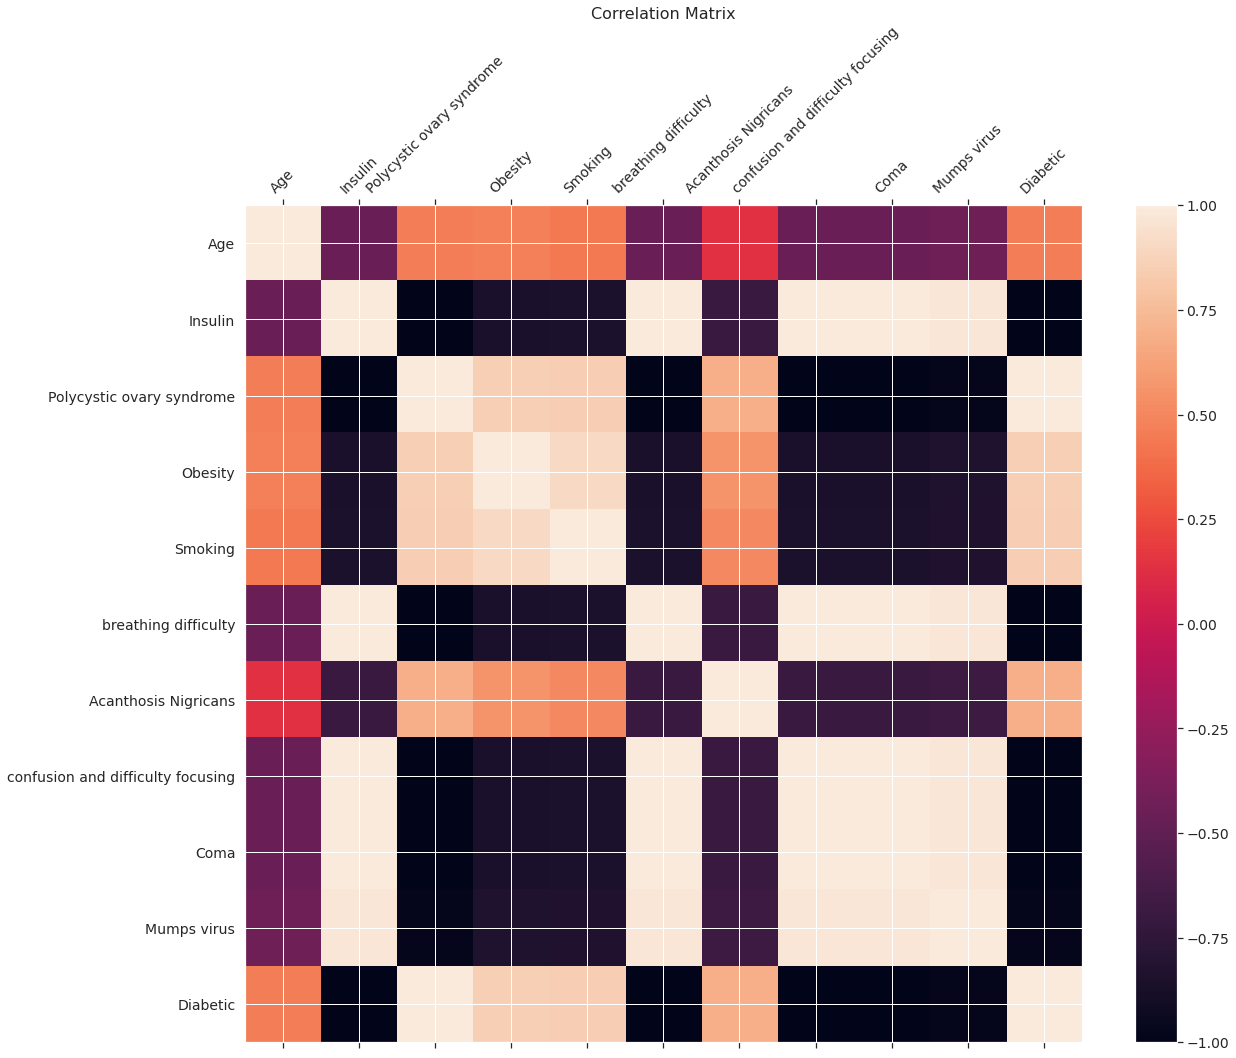

In [13]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Plotting the data

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'Polycystic ovary syndrome'}>],
       [<AxesSubplot:title={'center':'Obesity'}>,
        <AxesSubplot:title={'center':'Smoking'}>,
        <AxesSubplot:title={'center':'breathing difficulty'}>],
       [<AxesSubplot:title={'center':'Acanthosis Nigricans'}>,
        <AxesSubplot:title={'center':'confusion and difficulty focusing'}>,
        <AxesSubplot:title={'center':'Coma'}>],
       [<AxesSubplot:title={'center':'Mumps virus'}>,
        <AxesSubplot:title={'center':'Diabetic'}>, <AxesSubplot:>]],
      dtype=object)

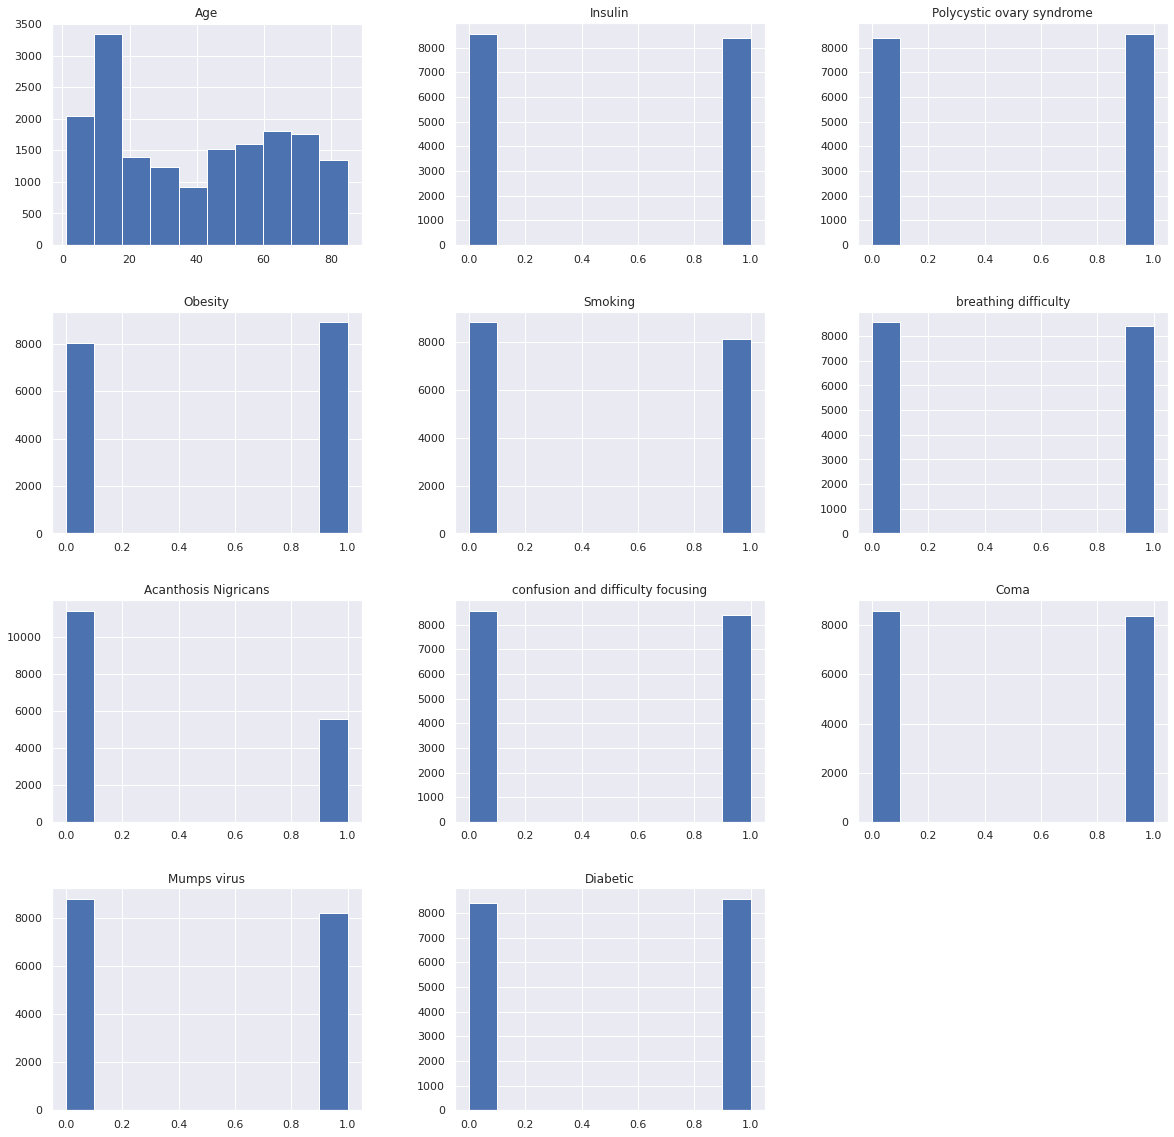

In [14]:
p = dataset.hist( figsize = (20,20) )
p

# Feature Selection

In [15]:
# colsNew=['Age','Insulin','Obesity','breathing difficulty','Coma','Diabetic']
# newDF = dataset[colsNew]
# newDF

# Separating data and labels

In [16]:
X = dataset.drop(columns='Diabetic', axis=1)  # All the data except the Diabetic Column
Y = dataset['Diabetic']

In [17]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.25,random_state=42)

# Making some chages to solve Duplicate problem that we mentioned earlier

In [18]:
my_list =[1,1,0,1,0,1,0,1,0,1]
l = Ytest[:4243]
w = pd.DataFrame(l)

w['Diabetic'][6109] = 1
w['Diabetic'][4715] = 1
w['Diabetic'][11200] = 0
w['Diabetic'][8197] = 1
w['Diabetic'][10249] = 0
w['Diabetic'][6395] = 1
w['Diabetic'][2995] = 0
w['Diabetic'][6753] = 1
w['Diabetic'][9980] = 0
w['Diabetic'][15212] = 1

Ytest[:4243] = w.squeeze()

In [19]:
di = {}
di2 = {}

Knn = KNeighborsClassifier()
Knn.fit(Xtrain,Ytrain)
Ypred = Knn.predict(Xtest)
err = metrics.mean_absolute_error(Ytest,Ypred)
di2.update({str(Knn):err})
print(Knn,":",r2_score(Ypred,Ytest)*100)
di.update({str(Knn):Knn.score(Xtest,Ytest)*100})

KNeighborsClassifier() : 99.2458115702068


# The Accuracy is 99% So everything is Ok .....
**Whithout the above chage that we make to solve the duplicate problem in our dataset the accuracy will appear as 100% then there are a mistake with running the Project without solving the Duplicate....**

# Scaling the data
* if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other. 
* Or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

# We can skip this step because all of our data in the dataset are (zero/one)

In [20]:
scaler = StandardScaler()
scaler.fit(X)
StandardizedData = scaler.transform(X)
X = StandardizedData

In [21]:
input_data = (50, 0, 1, 1, 1, 0, 1, 0, 0, 1)

# Changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array as  we are predicting for one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standadize the input data 
std_data = scaler.transform(input_data_reshaped)
# print(std_data)

prediction = Knn.predict(std_data)
# print(prediction)

if prediction == 0 : 
  print("\n===============\n\nType 1 Diabetic !!\n\n===============")
else : 
  print("\n===============\n\nType 2 Diabetic !!\n\n===============")

# print(input_data_reshaped)



Type 2 Diabetic !!



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
